In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score , recall_score , f1_score ,roc_auc_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score , cross_val_predict ,GridSearchCV ,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
df_actual = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/ALL_AML_actual.csv')

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/data_set_ALL_AML_train.csv')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Senior Year/Machine Learning/Data/data_set_ALL_AML_independent.csv')

In [ ]:
df_train

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [ ]:
df1 = [col for col in df_train.columns if "call" not in col]
df = df_train[df1]
df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [ ]:
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
df = df.T
df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)
df2.index = pd.to_numeric(df2.index)
df2.sort_index(inplace=True)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
df2['cat'] = list(df_actual[:38]['cancer'])
dic = {'ALL':0,'AML':1}
df2.replace(dic,inplace=True)
df2.head(3)

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,cat
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,0
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,0
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,0


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df2.drop('cat',axis=1))

from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [ ]:
X_reduced2 = Y_sklearn

In [ ]:
train = pd.DataFrame(X_reduced2)
train['cat'] =  df2['cat'].reset_index().cat
train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,cat
0,18.544799,5.826943,-19.442313,-11.267566,5.303304,19.100937,-9.447438,0.915309,-8.665217,-7.912754,...,6.323438,5.630107,-4.538090,-14.672156,4.899964,9.335462,-12.552358,2.484640,12.217094,0
1,-7.341389,10.008663,11.795698,3.920823,-13.999094,-18.636026,4.687060,8.812418,1.372678,-11.690751,...,-11.423156,-10.669290,-5.364779,-20.280586,7.685347,23.676243,5.216321,17.828269,-1.015588,0
2,52.852146,11.390630,-29.548566,-38.800348,-22.866689,-9.458113,-22.880735,20.995112,4.038731,-5.260765,...,1.847696,5.073579,0.797486,0.995521,-0.354742,-0.093794,2.769450,-2.868344,7.354274,0
3,13.688551,-6.246839,-22.623318,-3.982670,-1.351354,13.095198,29.457761,-10.493627,-12.248064,22.248153,...,-0.718683,1.204654,8.036715,21.272887,20.388530,9.384894,1.410416,24.731438,-8.574276,0
4,-36.790106,32.799698,5.253314,-2.790336,-6.602306,10.731372,2.410778,-4.505205,-9.751938,1.651788,...,6.278746,5.829900,-0.235727,3.875653,-2.760198,-2.021964,-2.234259,-2.444749,14.045705,0


In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=30)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=train['cat']
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

<ipython-input-13-e0db58bd7c0d>:12: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-13-e0db58bd7c0d>:14: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-13-e0db58bd7c0d>:16: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(-60.0, 0, ''),
 Text(-40.0, 0, ''),
 Text(-20.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20.0, 0, ''),
 Text(40.0, 0, ''),
 Text(60.0, 0, '')]

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

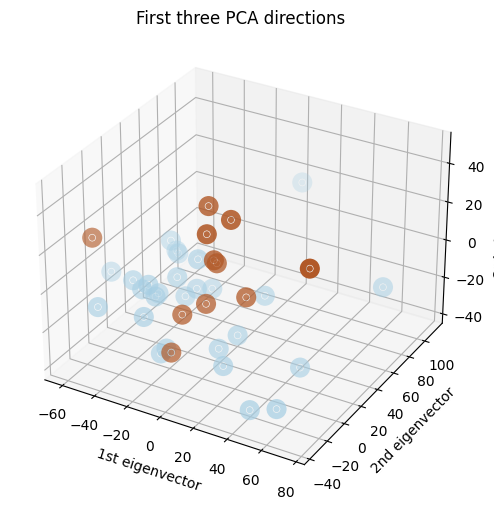

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.clf()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap=plt.cm.Paired, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
plt.show()

Text(0.5, 1.0, '2D Transformation of PCA ')

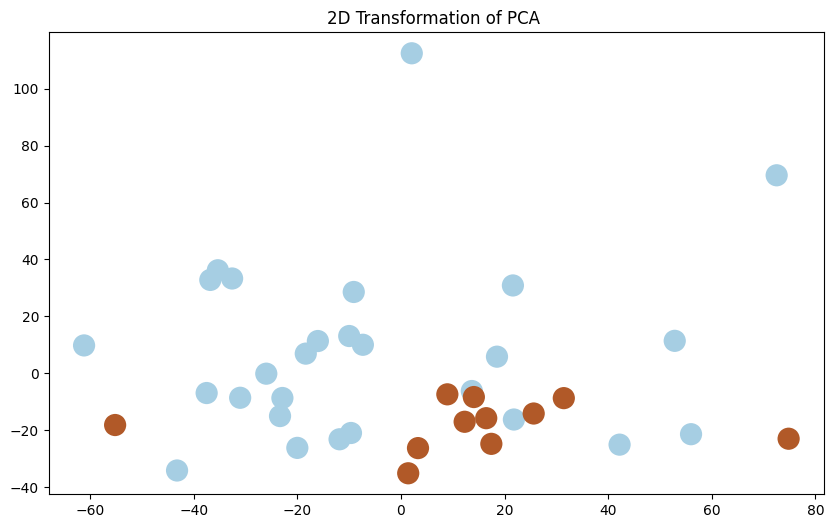

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1, figsize=(10,6))
plt.scatter(X_reduced[:, 0],  X_reduced[:, 1], c=df2['cat'],cmap=plt.cm.Paired,linewidths=10)
#plt.scatter(test_reduced[:, 0],  test_reduced[:, 1],c='r')
plt.title("2D Transformation of PCA ")

Dimensionality Reduction: PCA reduces the dimensionality of your data by finding the principal components that capture the most variance. Each point in the 3D plot represents a patient, plotted according to their scores on the first three principal components.

Data Variance and Separation: The axes (1st, 2nd, and 3rd eigenvectors) represent the directions in the data that explain the most variance. If different types of cancer (AML and ALL) form distinct clusters in this space, it suggests that these principal components capture differences in protein expression that are relevant to distinguishing between AML and ALL.

Interpretation of Clusters: Clustering or separation of points (patients) in the 3D space can indicate that the protein expression profiles are significantly different between AML and ALL. A clear separation would suggest a strong pattern in the data distinguishing the two types of leukemia.

Overlap and Complexity: If there is significant overlap between the points from different categories, it might indicate that the first three principal components are not enough to fully differentiate between AML and ALL, or that the relationship is more complex and might require additional analysis or more features for clear separation.

2D PCA Transformation
A 2D PCA plot (which I assume you might have or are planning to create) shows a similar analysis but using only the first two principal components. This simplifies the visualization and can sometimes make patterns more evident, though it captures less of the total variance in the data compared to a 3D plot.

Easier Visualization: It’s easier to visualize and interpret the 2D data, and it can often be sufficient to identify distinct groups or trends.

Patterns and Clustering: As with the 3D plot, look for how the points are distributed. Do the points form distinct clusters based on the cancer type? Is there a noticeable pattern or trend?

General Interpretation
Biological Significance: These plots can provide insights into the biological processes underlying different types of leukemia. For example, distinct clustering could point to specific protein expression profiles unique to each leukemia type.

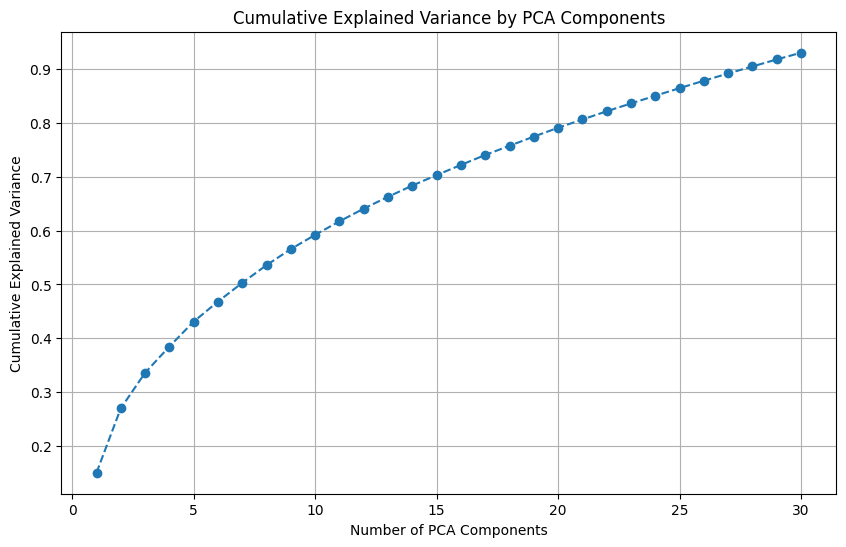

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# We already have the standardized data X_std
# Applying PCA to the dataset
pca = PCA(n_components=30)
pca.fit(X_std)

# Calculating the cumulative sum of explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting the Cumulative Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


According to this graph, 28 features account for 90% of data variance

In [ ]:
train_tk = [col for col in df_train.columns if "call" not in col]
test_tk = [col for col in df_test.columns if "call" not in col]

X_train_tr = df_train[train_tk]
X_test_tr = df_test[test_tk]

In [ ]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

X_train_tr = X_train_tr.reindex(columns=train_columns_titles)

In [ ]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

X_test_tr = X_test_tr.reindex(columns=test_columns_titles)

We transpose the dataset so that it flips the columns and rows, allowing to test for which genes contribute most to the patients type of cancer

In [ ]:
X_train = X_train_tr.T
X_test = X_test_tr.T

print(X_train.shape)
X_train.head()

(40, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

print(X_train.shape)
print(X_test.shape)
X_train.head()

(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [ ]:
df_gene_exp=pd.concat([X_train, X_test])
df_gene_exp.shape

(72, 7129)

In [ ]:
df_gene_exp.reset_index(inplace=True)

In [ ]:
df_gene_exp.rename(columns={'index':'patient_id'} , inplace = True)

In [ ]:
df_gene_exp.dtypes

Gene Accession Number
patient_id        object
AFFX-BioB-5_at     int64
AFFX-BioB-M_at     int64
AFFX-BioB-3_at     int64
AFFX-BioC-5_at     int64
                   ...  
X83863_at          int64
Z17240_at          int64
L49218_f_at        int64
M71243_f_at        int64
Z78285_f_at        int64
Length: 7130, dtype: object

In [ ]:
df_actual.rename(columns={'patient':'patient_id'} , inplace = True)
df_gene_exp = df_gene_exp.astype({"patient_id": int})

In [ ]:
df_gene_exp=pd.merge(df_gene_exp, df_actual, on='patient_id')

In [ ]:
df_gene_exp['cancer'].replace({'ALL':1, 'AML':0}, inplace=True)

In [ ]:
df_gene_exp.drop(['patient_id'] , axis=1 , inplace=True)

In [ ]:
X = df_gene_exp.loc[:, df_gene_exp.columns != 'cancer']
y = df_gene_exp['cancer']

This entire process was just to get a full dataset, one with just the results and one with the actual complete dataset. It allows to train a better model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52, stratify=y)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(54, 7129)
(54,)
(18, 7129)
(18,)


<Axes: ylabel='Density'>

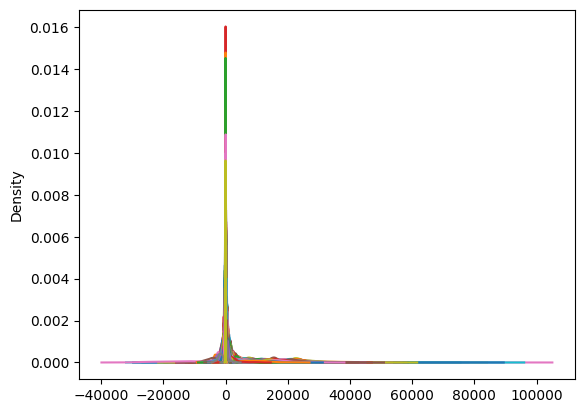

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df.plot(kind="kde", legend=None)

Looking at the graph will tell you that there is a large variance in density, thus to have better results its best to scale the feautres

In [ ]:
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

In [ ]:
X_pca_train = PCA(0.90 , random_state=0).fit(X_test_sc)

In [ ]:
X_var = np.cumsum(np.round(X_pca_train.explained_variance_ratio_, decimals=3) * 100)

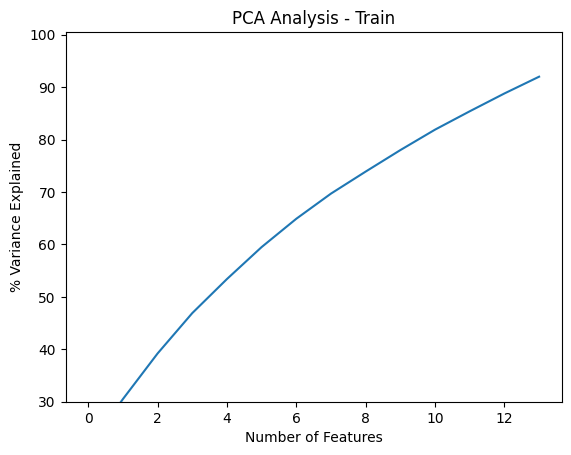

In [ ]:
plt.plot(X_var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis - Train')
plt.ylim(30, 100.5)
plt.style.context('seaborn-whitegrid')

In [ ]:
print('%d components explain 90%% of the variation in data' % X_pca_train.n_components_)

14 components explain 90% of the variation in data


Find the amount of components that explain the result, we use PCA since there are about 7000 features after transposing

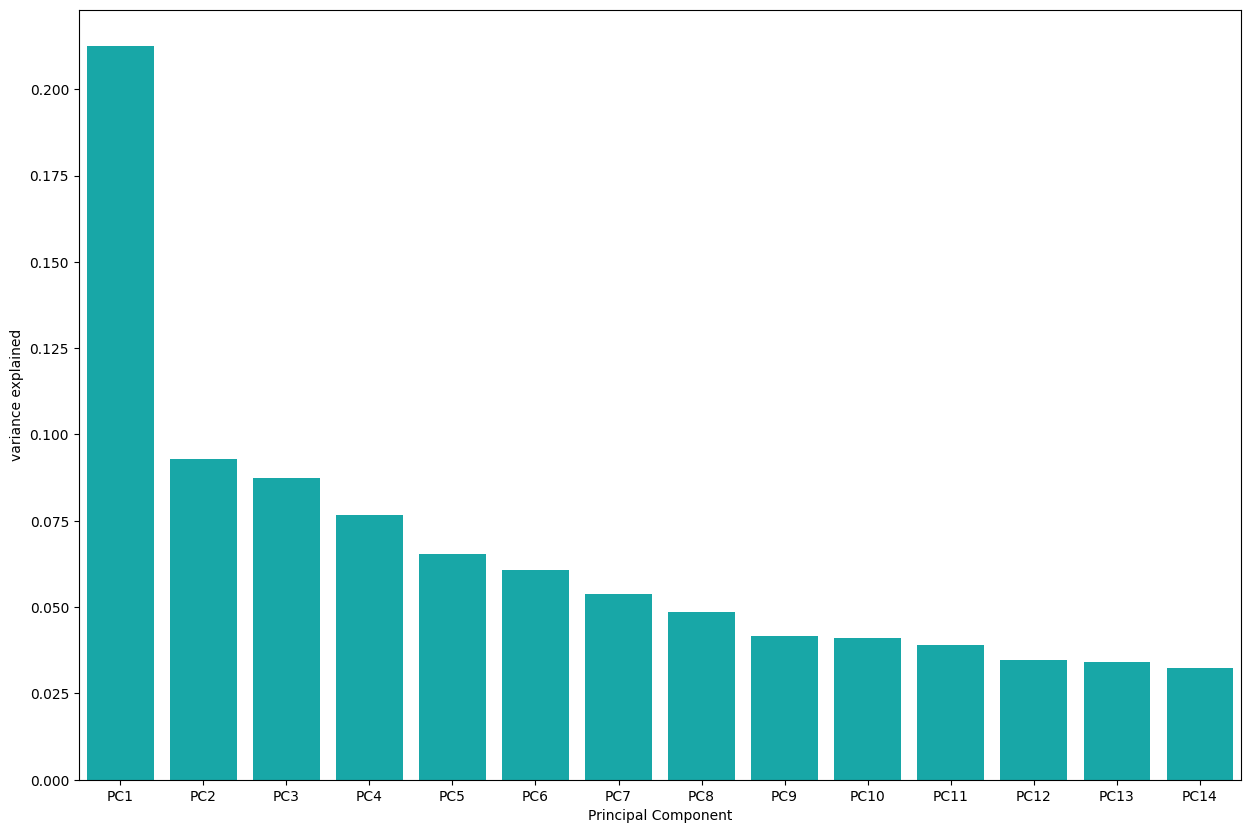

In [ ]:
df = pd.DataFrame({'variance explained':X_pca_train.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13',
                                   'PC14']})
plt.figure(figsize=(15,10))
sns.barplot(x='Principal Component',y="variance explained", data=df, color="c");

In [ ]:
pca = PCA(n_components=X_pca_train.n_components_, random_state=55)
pca.fit(X_train_sc)
X_pca_train= pca.transform(X_train_sc)
X_pca_test= pca.transform(X_test_sc)
print(X_pca_train.shape)
print(X_pca_test.shape)

(54, 14)
(18, 14)


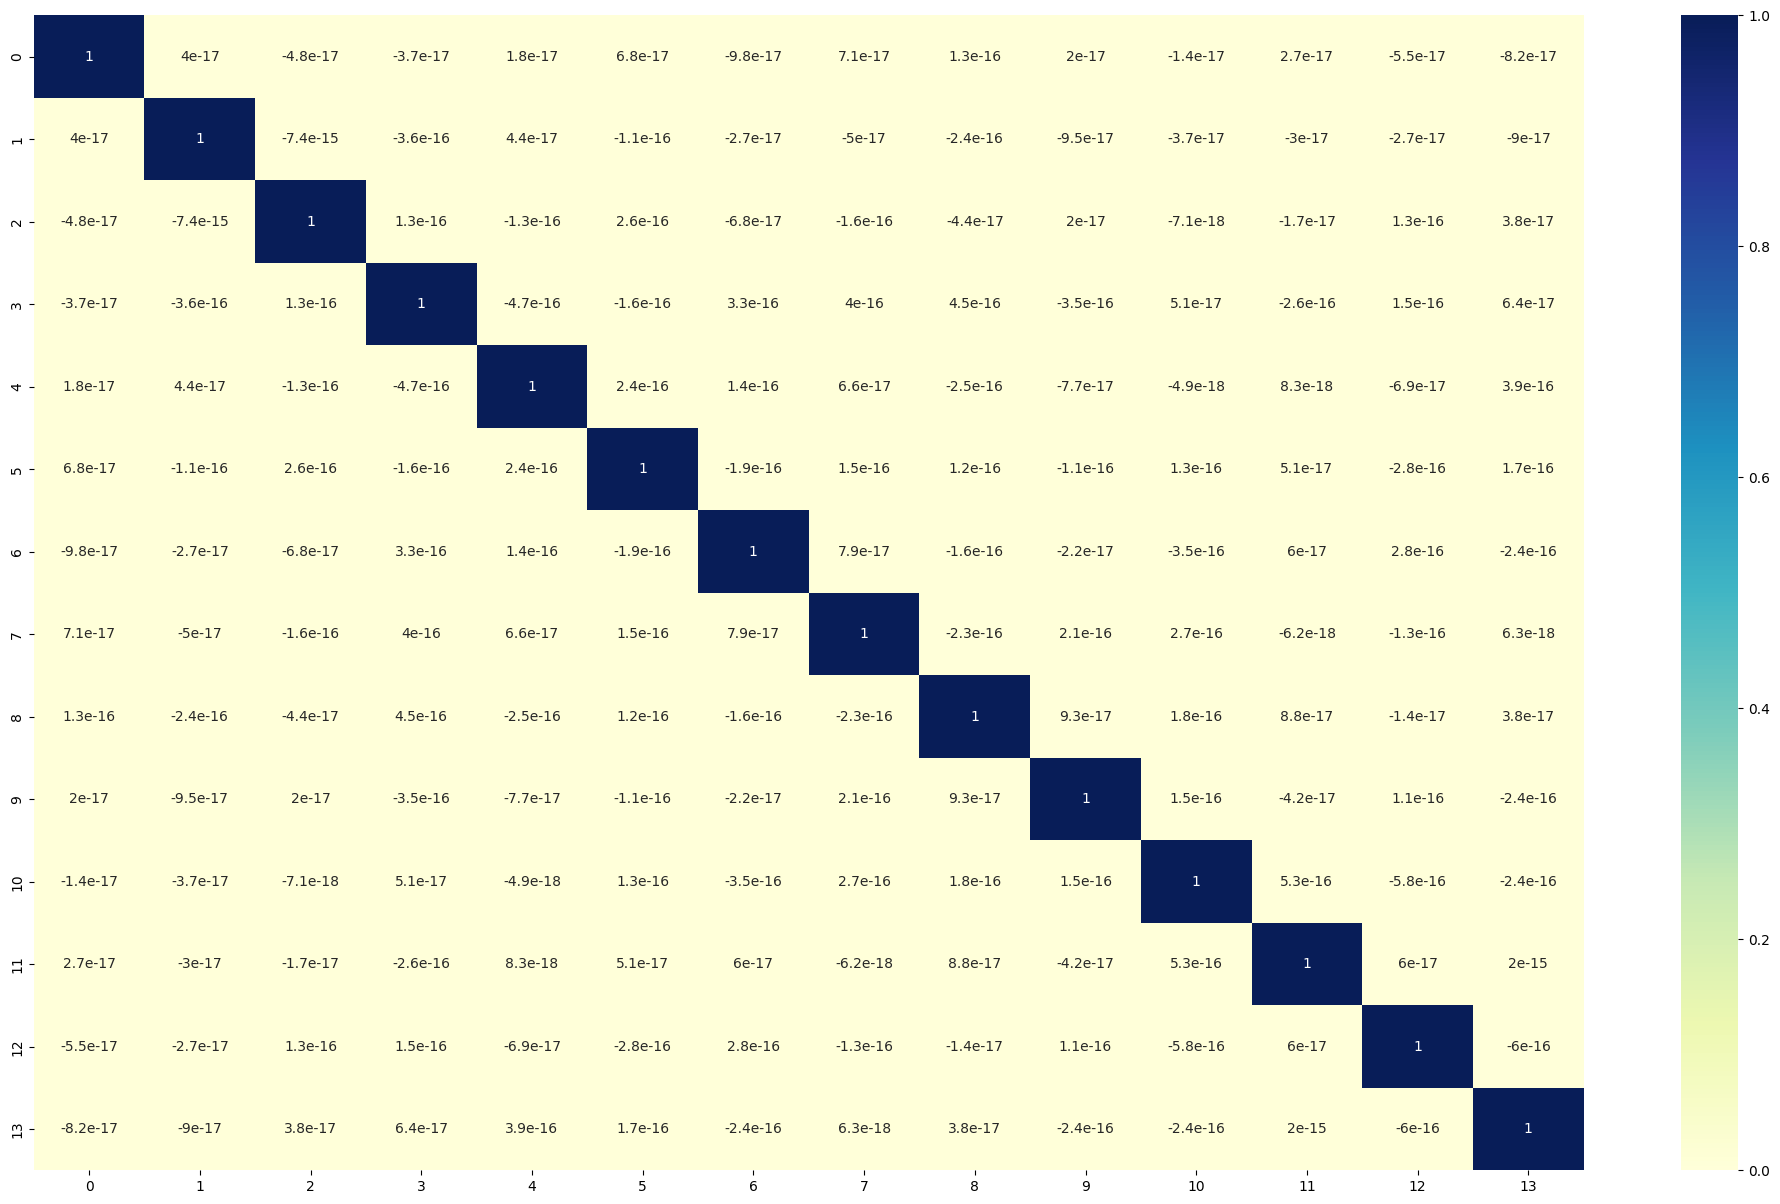

In [ ]:
X_df_pca_train=pd.DataFrame(X_pca_train)
plt.figure(figsize = (25, 15))
sns.heatmap(X_df_pca_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
oversample = SMOTE()
X_smote_train, y_smote_train = oversample.fit_resample(X_pca_train,y_train)
X_smote_test, y_smote_test = oversample.fit_resample(X_pca_test,y_test)
print(Counter(y_smote_train))
print(Counter(y_smote_test))

Counter({1: 35, 0: 35})
Counter({1: 12, 0: 12})


In [ ]:
df_model=pd.DataFrame(columns=['Model','Accuracy Score' ,'F1 Score', 'Precision Score' , 'Recall Score' ,'ROC AUC'])
df_model_performance =df_model
df_model_test_train_acc = pd.DataFrame(columns=['Model' , 'Train Accuracy Score' ,'Test Accuracy Score'])
df_model_accuracy =df_model_test_train_acc

The next few parts are to actually test different types of models, I got the idea online of creating different functions to evaluate faster

In [ ]:
def get_classifier_predictions(classifier, X_train, y_train, X_test):
    classifier = classifier
    classifier.fit(X_train,y_train)
    y_pred_train =classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    y_pred_prob_train = classifier.predict_proba(X_train)
    y_pred_prob_test = classifier.predict_proba(X_test)
    return y_pred_train, y_pred_test, y_pred_prob_train,y_pred_prob_test

In [ ]:
def get_best_hyperparameters():
    print("Best Accuracy    :",  search.best_score_)
    print("Best Parameters  : ", search.best_params_)
    print("Best Estimators : ",  search.best_estimator_)
    best_grid = search.best_estimator_
    return best_grid

In [ ]:
def print_classifier_scores(classifier, X_train, X_test, y_train ,y_test,y_pred_train, y_pred_test,y_pred_prob_train, y_pred_prob_test,algorithm):
    v_recall_score_train =  recall_score(y_train,y_pred_train)
    v_precision_score_train = precision_score(y_train,y_pred_train)
    v_f1_score_train =  f1_score(y_train,y_pred_train)
    v_accuracy_score_train = accuracy_score(y_train,y_pred_train)
    v_roc_auc_train = roc_auc_score(y_train, y_pred_prob_train[:,1])

    print('Train-Set Confusion Matrix:\n', confusion_matrix(y_train,y_pred_train))
    print("Recall Score    : ", v_recall_score_train)
    print("Precision Score : ", v_precision_score_train)
    print("F1 Score        : ", v_f1_score_train)
    print("Accuracy Score  : ", v_accuracy_score_train)
    print("ROC AUC         :  {}".format(v_roc_auc_train))


    v_recall_score_test =  recall_score(y_test,y_pred_test)
    v_precision_score_test = precision_score(y_test,y_pred_test)
    v_f1_score_test =  f1_score(y_test,y_pred_test)
    v_accuracy_score_test = accuracy_score(y_test,y_pred_test)
    v_roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:,1])

    print('Test-Set Confusion Matrix:\n', confusion_matrix(y_test,y_pred_test))
    print("Recall Score    : ", v_recall_score_test)
    print("Precision Score : ", v_precision_score_test)
    print("F1 Score        : ", v_f1_score_test)
    print("Accuracy Score  : ", v_accuracy_score_test)
    print("ROC AUC         :  {}".format(v_roc_auc_test))


    df_model_test_train_acc = dict({'Model' : algorithm, 'Train Accuracy Score' :v_accuracy_score_train,'Test Accuracy Score' :v_accuracy_score_test })
    df_model_performance = dict({'Model' : algorithm, 'Accuracy Score' :v_accuracy_score_test, 'F1 Score' : v_f1_score_test, 'Precision Score' : v_precision_score_test, 'Recall Score' :v_recall_score_test, 'ROC AUC' : v_roc_auc_test})

    return df_model_test_train_acc , df_model_performance

In [ ]:
logreg_params = {'penalty' : ['l2'],
                 'C' : np.logspace(-1, 2, 100),
                 'solver' :['liblinear'],
                 'random_state' :[42,99]
                 }
cross_validation = StratifiedKFold(n_splits=5,shuffle=True)

search = GridSearchCV(estimator=LogisticRegression(), param_grid=logreg_params, n_jobs=-1, verbose=1,cv=cross_validation )
search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.10722672,   0.1149757 ,   0.12328467,
         0.13219411,   0.14174742,   0.15199111,   0.16297508,
         0.17475284,   0.18738174,   0.2009233 ,   0.21544347,
         0.23101297,   0.24770764,   0.26560878,   0.28480359,
         0.30538555,   0.32745492,   0.35111917,   0.37649358,...
        20.09233003,  21.5443469 ,  23.101297  ,  24.77076356,
        26.56087783,  28.48035868,  30.53855509,  32.74549163,
        35.11191734,  37.64935807,  40.37017259,  43.28761281,
        46.41588834,  49.77023564,  53.36699231,  57.22367659,
        61.35907273,  65.79332247,  70.54802311,  75.64633276,
        81.11308308,  86.97490026,  93.26033469, 100.        ]),
                         'penalty': ['l2'], 'random_state': [42, 99],
                         'solver': ['liblinear']},
             verbose=1)

In [ ]:
lr_best_grid= get_best_hyperparameters()

Best Accuracy    : 0.9428571428571428
Best Parameters  :  {'C': 0.1, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Estimators :  LogisticRegression(C=0.1, random_state=42, solver='liblinear')


In [ ]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(lr_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc1 , df_model_performance1=print_classifier_scores(lr_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Logistic Regression'  )
df_model=df_model.append(df_model_performance1,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc1, ignore_index=True)

Train-Set Confusion Matrix:
 [[35  0]
 [ 0 35]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0
Test-Set Confusion Matrix:
 [[12  0]
 [ 0 12]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0


<ipython-input-48-88579bcd848d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model=df_model.append(df_model_performance1,ignore_index=True )
<ipython-input-48-88579bcd848d>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc1, ignore_index=True)


In [ ]:
naivebayes = GaussianNB()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(naivebayes, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc2 , df_model_performance2=print_classifier_scores(naivebayes, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Naive Bayes'  )
df_model=df_model.append(df_model_performance2,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc2, ignore_index=True)

Train-Set Confusion Matrix:
 [[34  1]
 [ 2 33]]
Recall Score    :  0.9428571428571428
Precision Score :  0.9705882352941176
F1 Score        :  0.9565217391304348
Accuracy Score  :  0.9571428571428572
ROC AUC         :  0.9722448979591837
Test-Set Confusion Matrix:
 [[12  0]
 [ 0 12]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0


<ipython-input-49-3a74191b1a81>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model=df_model.append(df_model_performance2,ignore_index=True )
<ipython-input-49-3a74191b1a81>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc2, ignore_index=True)


In [ ]:
dt_params = {'max_depth' :  [i for i in range(3,8,1)],
             'max_features': np.linspace(0.1, 0.5, 5, endpoint=True),
             'min_samples_leaf':  [i for i in range(1,6,1)],
             'min_samples_split':[i for i in range(1,3,1)],
             'max_leaf_nodes': list(range(2, 100)),
             'random_state' :[0,1,2 ,3, 4,5,42,99]
                 }
cross_validation = StratifiedKFold(n_splits=5,shuffle=True)
search = GridSearchCV(DecisionTreeClassifier(), dt_params, n_jobs=-1, verbose=1,cv=cross_validation )
search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 196000 candidates, totalling 980000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
490000 fits failed out of a total of 980000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
490000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2],
                         'random_state': [0, 1, 2, 3, 4, 5, 42, 99]},
             verbose=1)

In [ ]:
dt_best_grid=get_best_hyperparameters()

Best Accuracy    : 0.9
Best Parameters  :  {'max_depth': 4, 'max_features': 0.30000000000000004, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 99}
Best Estimators :  DecisionTreeClassifier(max_depth=4, max_features=0.30000000000000004,
                       max_leaf_nodes=6, min_samples_leaf=2, random_state=99)


In [ ]:
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(dt_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc3, df_model_performance3=print_classifier_scores(dt_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'Decision Tree Classifier'  )
df_model=df_model.append(df_model_performance3,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc3, ignore_index=True)

Train-Set Confusion Matrix:
 [[35  0]
 [ 3 32]]
Recall Score    :  0.9142857142857143
Precision Score :  1.0
F1 Score        :  0.955223880597015
Accuracy Score  :  0.9571428571428572
ROC AUC         :  0.9910204081632653
Test-Set Confusion Matrix:
 [[12  0]
 [ 2 10]]
Recall Score    :  0.8333333333333334
Precision Score :  1.0
F1 Score        :  0.9090909090909091
Accuracy Score  :  0.9166666666666666
ROC AUC         :  0.986111111111111


<ipython-input-52-92404266af6a>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model=df_model.append(df_model_performance3,ignore_index=True )
<ipython-input-52-92404266af6a>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc3, ignore_index=True)


In [ ]:
knn_params = {"n_neighbors": [5,6,7],
              "weights": ["uniform", "distance"],
              "algorithm": ["ball_tree", "kd_tree", "brute"],
              "leaf_size": [5, 10,15,20,25, 30],
               "p": [2]
             }

search = GridSearchCV(KNeighborsClassifier(), knn_params, n_jobs=-1, verbose=1,cv=10 )
search.fit(X_smote_train, y_smote_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20, 25, 30],
                         'n_neighbors': [5, 6, 7], 'p': [2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
knn_best_grid=get_best_hyperparameters()
y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test = get_classifier_predictions(knn_best_grid, X_smote_train, y_smote_train, X_smote_test )
df_model_test_train_acc5, df_model_performance5=print_classifier_scores(knn_best_grid, X_smote_train, X_smote_test, y_smote_train , y_smote_test, y_pred_train, y_pred_test, y_pred_prob_train, y_pred_prob_test , 'K-Nearest Neighbours'  )
df_model=df_model.append(df_model_performance5,ignore_index=True )
df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc5, ignore_index=True)

Best Accuracy    : 0.8857142857142858
Best Parameters  :  {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Best Estimators :  KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, weights='distance')
Train-Set Confusion Matrix:
 [[35  0]
 [ 0 35]]
Recall Score    :  1.0
Precision Score :  1.0
F1 Score        :  1.0
Accuracy Score  :  1.0
ROC AUC         :  1.0
Test-Set Confusion Matrix:
 [[12  0]
 [ 1 11]]
Recall Score    :  0.9166666666666666
Precision Score :  1.0
F1 Score        :  0.9565217391304348
Accuracy Score  :  0.9583333333333334
ROC AUC         :  1.0


<ipython-input-54-78ed54858915>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model=df_model.append(df_model_performance5,ignore_index=True )
<ipython-input-54-78ed54858915>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_test_train_acc= df_model_test_train_acc.append(df_model_test_train_acc5, ignore_index=True)


In [ ]:
df_model.sort_values(by=['Accuracy Score'], ascending=False)

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score,ROC AUC
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,1.000000
1,Naive Bayes,1.000000,1.000000,1.0,1.000000,1.000000
3,K-Nearest Neighbours,0.958333,0.956522,1.0,0.916667,1.000000
2,Decision Tree Classifier,0.916667,0.909091,1.0,0.833333,0.986111


In [ ]:
df_model_test_train_acc.sort_values(by=['Train Accuracy Score','Test Accuracy Score'], ascending=False ,ignore_index=True)

,Model,Train Accuracy Score,Test Accuracy Score
0,Logistic Regression,1.000000,1.000000
1,K-Nearest Neighbours,1.000000,0.958333
2,Naive Bayes,0.957143,1.000000
3,Decision Tree Classifier,0.957143,0.916667


Since we specifically chose the genes that had the highest variance, the logistic regression had the highest total score. Though it could just be that it was overtrained and might fail with out of sample data.